In [25]:
import pandas as pd
import os

In [102]:
user_data_df = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs_df = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')
df = user_data_df.merge(logs_df,on='client')

# 1) В переменной df находится датафрэйм. Ваша задача положить в переменную  df_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:  
'df has y rows and x columns'
где y – число строк, а x – число колонок.

In [29]:
print('df has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

df has 3439 rows and 6 columns


# Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения.

Функция поиска пропущенных значений для каждой колонки

Первый способ:

In [54]:
na_numbers = {}

In [48]:
def na_count(df,col):
    df = df.isna()
    df = df[df[col]==True]
    na_numbers[col] = df[col].count()

In [49]:
for column in data.columns: # Запуск функции
    na_count(data,column)

In [50]:
na_numbers

{'client': 0, 'premium': 0, 'age': 0, 'success': 0, 'platform': 0, 'time': 0}

Второй способ:

In [60]:
na_numbers = df.isna().sum()
na_numbers

client      0
premium     0
age         0
success     0
platform    0
time        0
dtype: int64

# Проверка с другим df:

Первый способ писать NaN значение:

In [39]:
test_df = pd.DataFrame({'a': [1,None,3], 'b':['aaa', None, None]})
test_df

,a,b
0,1.0,aaa
1,NaN,None
2,3.0,None


Второй способ писать Nan значение:

In [40]:
import numpy as np

In [42]:
test_df = pd.DataFrame({'a': [1,np.nan,3], 'b':['aaa', np.nan, np.nan]})
test_df

,a,b
0,1.0,aaa
1,NaN,NaN
2,3.0,NaN


In [58]:
na_numbers = test_df.isna().sum()
na_numbers

a    1
b    2
dtype: int64

# Сохраните в переменную df_types типы данных каждой колонки датафрэйма df

In [62]:
df_types = df.dtypes
df_types

client       int64
premium       bool
age          int64
success       bool
platform    object
time         int64
dtype: object

# Внезапно оказалось, что в переменной age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.

In [22]:
# Изменить тип данных в DF: df.astype{column:type}
# Изменить строчное значение даты на формат даты: pd.to_datetime(df[col])

In [84]:
test_df['age'] = [6,8,11]
test_df['sex'] = ['male','male','female']
test_df

,a,b,age,sex
0,1.0,aaa,6,male
1,NaN,NaN,8,male
2,3.0,NaN,11,female


In [66]:
test_df.dtypes

a      float64
b       object
age      int64
dtype: object

In [74]:
test_df = test_df.astype({'age':'object'})

In [75]:
test_df.dtypes

a      float64
b       object
age     object
dtype: object

In [78]:
test_df = test_df.astype({'age':'int'})

In [79]:
test_df.dtypes

a      float64
b       object
age      int32
dtype: object

# Удаление не нужных для аналиха колонок из DF

In [105]:
df = df.drop(columns=['time','success'])

In [106]:
df

,client,premium,age,platform
0,46346,False,58,phone
1,4391,False,55,phone
2,27372,False,64,phone
3,11989,False,44,computer
4,60664,False,49,phone
...,...,...,...,...
3434,19411,False,29,phone
3435,61579,False,50,phone
3436,61221,True,64,phone
3437,29863,False,46,tablet


# А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id – дропните все строки, в которых значения в колонке client_id повторяются.

In [108]:
df.drop_duplicates(subset=['client'])

,client,premium,age,platform
0,46346,False,58,phone
1,4391,False,55,phone
2,27372,False,64,phone
3,11989,False,44,computer
4,60664,False,49,phone
...,...,...,...,...
3434,19411,False,29,phone
3435,61579,False,50,phone
3436,61221,True,64,phone
3437,29863,False,46,tablet


# Небольшой перерыв на чистый питон. В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. При этом, если вам попался 0, то нужно прекратить этот цикл.
Например,
numbers = [1, -2, 3, 0, -3, 2]
Тогда positive_numbers должен быть:
positive_numbers = [1, 3]

In [109]:
numbers = [1, -2, 3, 0, -3, 2]

In [113]:
positive_numbers = []
for number in numbers:
    if number == 0:
        break
    if number > 0:
        positive_numbers.append(number)

In [114]:
positive_numbers

[1, 3]

#  Продолжим анализ данных по поездкам. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!
Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

In [257]:
taxi = pd.read_csv(r'taxi_peru.csv',sep=';')
taxi.shape

(23111, 19)

In [258]:
# taxi['start_at'] = pd.to_datetime(taxi['start_at'])
# taxi['end_at'] = pd.to_datetime(taxi['end_at'])
# taxi['arrived_at'] = pd.to_datetime(taxi['arrived_at'])
taxi[['start_at','end_at','arrived_at']] = taxi[['start_at','end_at','arrived_at']].apply(pd.to_datetime)

In [259]:
taxi = taxi[(taxi['start_type']=='asap') | (taxi['start_type'] == 'reserved')]

In [260]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


# ⭐️Задание со звёздочкой!⭐️
Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')

In [261]:
wait = taxi['arrived_at'] - taxi['start_at']

In [262]:
taxi['wait_time'] = wait.astype('timedelta64[m]')

# ⭐️Задание со звёздочкой!⭐️
Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [263]:
taxi[(taxi['start_type']=='reserved') & (taxi['wait_time']>0)] \
    .groupby('driver_id',as_index=False) \
    .count() \
    .sort_values('journey_id',ascending=False) \
    .loc[:,['driver_id','journey_id']] \
    .rename(columns={'journey_id':'times'})

,driver_id,times
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45
...,...,...
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
51,8cb98e46b27af1e6fca8768a2a6329f3,1
16,389bfa333ba8fa7281dd5f0e1b57c0c1,1


# ⭐️Задание со звёздочкой!⭐️
Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели.

In [343]:
taxi['month'] = taxi['start_at'].dt.month
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')

In [344]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,...,drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,0.0,7,Saturday
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,...,drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0,13.0,10,Saturday
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,...,drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,9.0,9,Tuesday
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,...,drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,-7.0,4,Thursday


# ⭐️Задание со звёздочкой!⭐️
Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 

In [345]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [346]:
times_month = taxi.groupby('month',as_index=False) \
     .count() \
     .loc[:,['month','journey_id']] \
     .rename(columns={'journey_id':'times'})
times_month

,month,times
0,1,573
1,2,766
2,3,983
3,4,1445
4,5,1584
5,6,1936
6,7,1512
7,8,2120
8,9,2598
9,10,3240


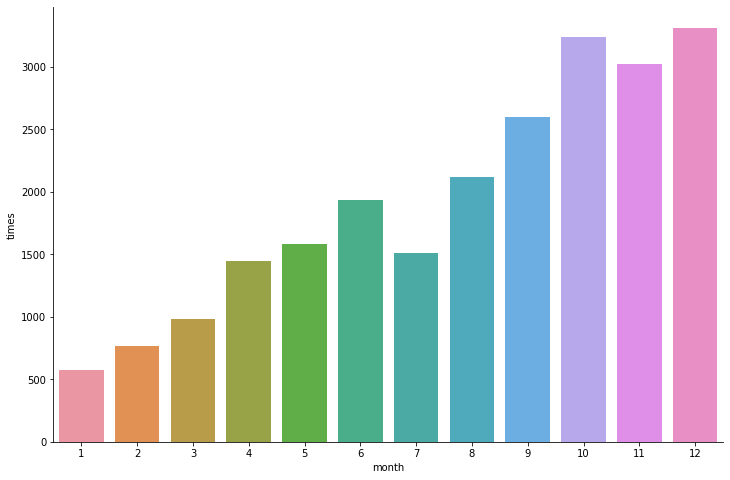

In [374]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data=times_month,x='month',y='times')
sns.despine()

c:\users\сергей\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


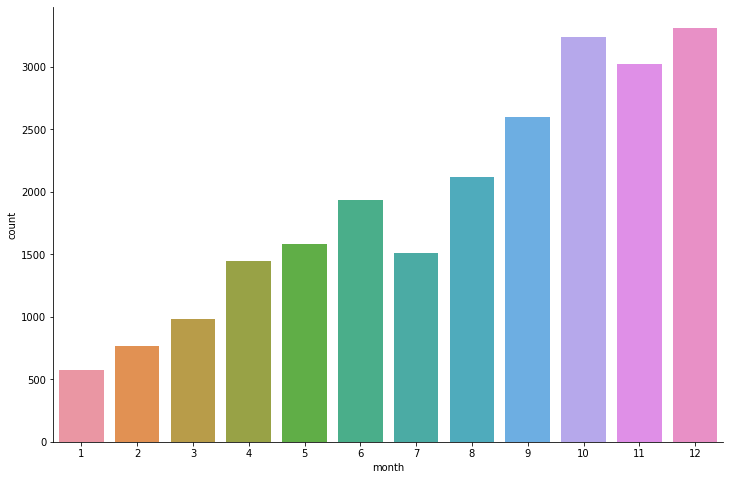

In [375]:
plt.figure(figsize = (12,8))
sns.countplot(taxi['month'])
sns.despine()

# А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступило меньше всего заказов?

In [349]:
set(taxi['weekday'].values)

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

c:\users\сергей\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


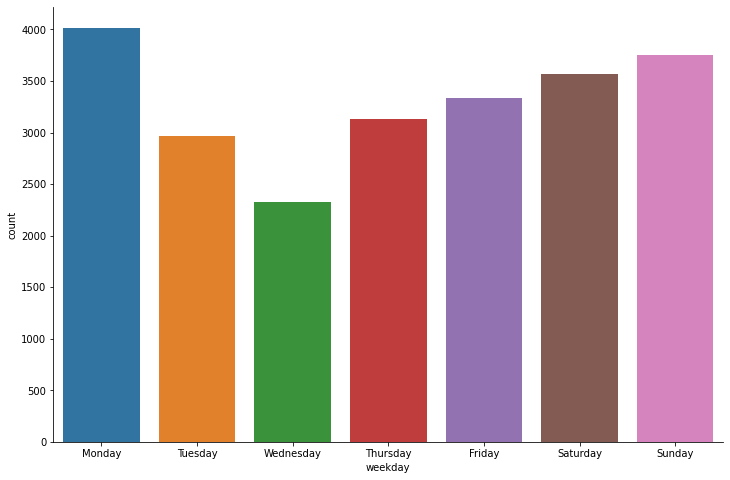

In [369]:
plt.figure(figsize = (12,8));
sns.countplot(taxi['weekday'],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);
sns.despine();

# ⭐️Задание со звёздочкой!⭐️
Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:  
DAU (daily active users) – число уникальных пользователей за день  
WAU (weekly active users) – число уникальных пользователей за неделю  
MAU (monthly active users) – число уникальных пользователей за месяц  
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени.   Постройте график MAU и выберите верные утверждения.   
Могут пригодиться:  
groupby – группировка  
nunique – число уникальных значений  
plot.line – линейная диаграмма  

In [370]:
MAU = taxi.groupby('month') \
    .agg({'user_id': pd.Series.nunique})

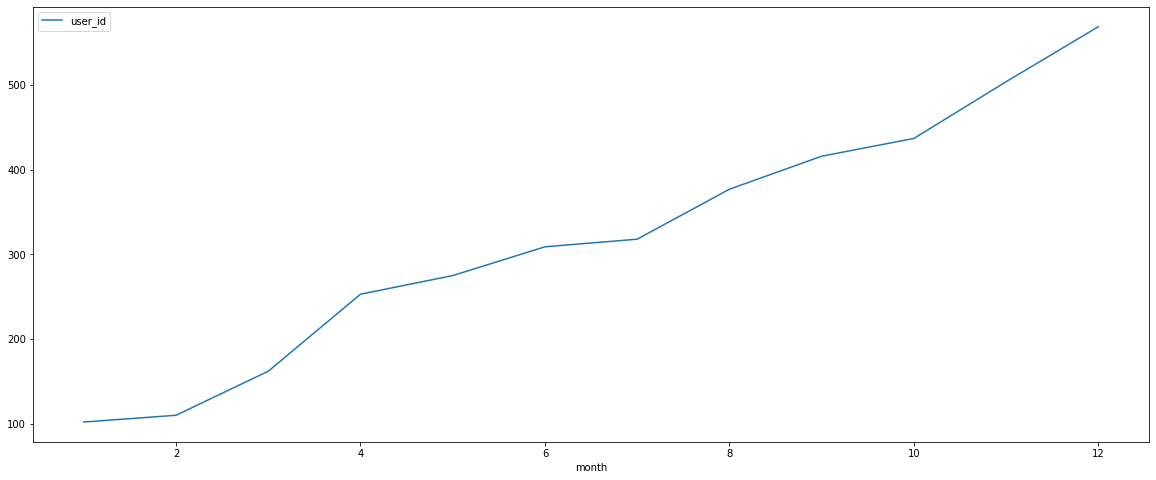

In [371]:
MAU.plot(figsize=(20,8));

In [372]:
xticks = range(1,13)

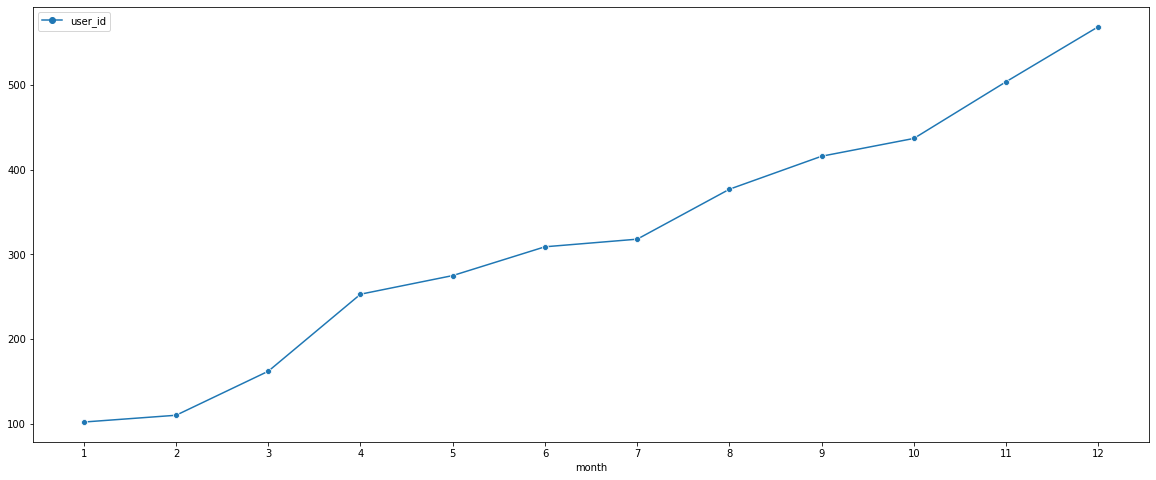

In [373]:
plt.figure(figsize = (20,8))
sns.lineplot(data=MAU,markers='o')
plt.xticks(xticks);

<Figure size 1440x576 with 0 Axes>

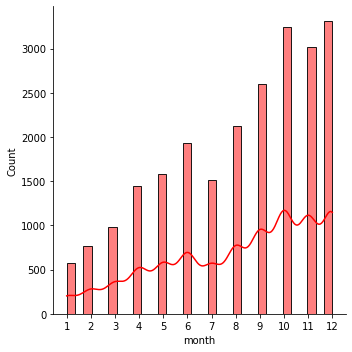

In [386]:
plt.figure(figsize = (20,8))
sns.displot(taxi['month'],kde=True,color='r',alpha=0.5)
plt.xticks(xticks);